In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/dataset/data_csv.csv')
x_values = df['x'].tolist()
print(sorted(x_values))
print(len(x_values))

[0.000390469096601, 0.0004857757676653, 0.0012382569122907, 0.0021626686211675, 0.0033727432601153, 0.0034887993242591, 0.003488868009299, 0.0036169746890664, 0.0039788548839761, 0.0046207169070839, 0.0047106430865824, 0.0050764905754476, 0.0061341566033661, 0.0070293342070359, 0.0071514215945523, 0.0077782288727122, 0.0078013557955554, 0.0079961914298783, 0.0080864345654845, 0.0081842592917382, 0.009906857041642, 0.0099596153259739, 0.0100474319325764, 0.0101753193885088, 0.013602873776108, 0.0145019227885502, 0.0148745134938508, 0.0150770389009267, 0.0168863606290526, 0.0172588042914867, 0.0187767867464572, 0.019237641710788, 0.0198703256393202, 0.0208732977043837, 0.0212147129078499, 0.0214469599734753, 0.0216221618466079, 0.0232842043003746, 0.0236339953262359, 0.0237849854066404, 0.025527955027902, 0.0257415476582472, 0.0264258317999503, 0.0271017723716795, 0.0273055508018385, 0.0274863085823524, 0.0293381884694099, 0.0297060528338587, 0.0299155172127746, 0.0326962887775153, 0.032

/opt/conda/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Best distribution: gamma
Best parameters: (1.0670699752982742, 0.00031981962970932174, 0.4826855809531399)
AIC: 676.4614438683911


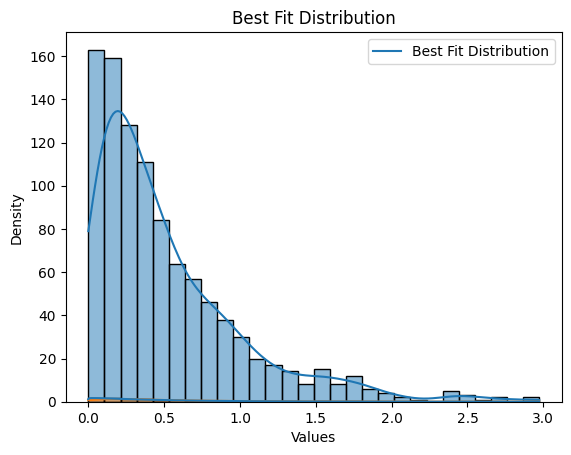

In [2]:
#Q1
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Visualize the data
sns.histplot(x_values, kde = True)
plt.title('Histogram of Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
#plt.show()


distributions = [stats.norm, stats.expon, stats.gamma, stats.beta]

best_fit = None
best_params = None
best_aic = np.inf

for distribution in distributions:
    params = distribution.fit(x_values)
    
    # Calculate AIC
    log_likelihood = distribution.logpdf(x_values, *params).sum()
    aic = 2 * len(params) - 2 * log_likelihood
    
    if aic < best_aic:
        best_fit = distribution
        best_params = params
        best_aic = aic

print(f"Best distribution: {best_fit.name}")
print(f"Best parameters: {best_params}")
print(f"AIC: {best_aic}")

# Plot the best fit distribution
sns.histplot(x_values, kde = True, stat = 'density')
x = np.linspace(min(x_values), max(x_values), 1000)
plt.plot(x, best_fit.pdf(x, *best_params), label = 'Best Fit Distribution')
plt.title('Best Fit Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

In [21]:
#Q9
from scipy.stats import kstest

# Fitted parameters for the gamma distribution
alpha, loc, inverse_beta = best_params 

# Perform Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(x_values, 'gamma', args=(alpha, loc, inverse_beta))

# Print the results
print("Kolmogorov-Smirnov test:")
print("KS Statistic:", ks_statistic)
print("KS p-value:", ks_p_value)

# Compare the p-value to the significance level to make a decision
alpha = 0.05 

if ks_p_value > alpha:
    print("Fail to reject the null hypothesis: Data follows the fitted gamma distribution.")
else:
    print("Reject the null hypothesis: Data does not follow the fitted gamma distribution.")


Kolmogorov-Smirnov test:
KS Statistic: 0.02055539347141072
KS p-value: 0.7839204073824722
Fail to reject the null hypothesis: Data follows the fitted gamma distribution.


In [4]:
#Q4
# Calculate sample mean and variance
sample_mean = np.mean(x_values)
sample_variance = np.var(x_values, ddof = 1)

# Estimate shape (alpha) and scale (1 / beta) parameters using method of moments
alpha_mm = (sample_mean ** 2) / sample_variance
beta_mm = sample_variance / sample_mean

print("Estimated parameters using method of moments:")
print(f"Shape (alpha): {alpha_mm}")
print(f"Scale (1 / beta): {beta_mm}")


Estimated parameters using method of moments:
Shape (alpha): 1.0895374157643936
Scale (1 / beta): 0.47303685230856923


In [8]:
#Q5
n = len(x_values)
x_bar = np.mean(x_values)
log_x = np.log(x_values)
log_x_bar = np.log(x_bar)
umvue_alpha = (2 * n - 1) / np.sum((log_x - log_x_bar) ** 2)
print("UMVUE estimate for the shape parameter (alpha):", umvue_alpha)

UMVUE estimate for the shape parameter (alpha): 1.1119116489600962


In [9]:
umvue_beta = (np.sum(x_values) / n) / umvue_alpha
print("UMVUE estimate for the inverse scale parameter (beta):", umvue_beta)

UMVUE estimate for the inverse scale parameter (beta): 0.46351825714535505


In [9]:
'''
x_bar = np.mean(x_values) * len(x_values) / (len(x_values) - 1)
mu = np.mean(x_values)
sigma_estimate_biased = np.std(x_values)
sigma_estimate_unbiased = np.sqrt(np.sum((x_values - mu)**2) / len(x_values))
print("Sample mean (x_bar):", x_bar)
print("Population mean (mu):", mu)
print("Biased estimate of population standard deviation (sigma_biased):", sigma_estimate_biased)
print("Unbiased estimate of population standard deviation (sigma_unbiased):", sigma_estimate_unbiased)
print(np.std(x_values, ddof = 1))  # Use ddof=1 for sample standard deviation)
'''

Sample mean (x_bar): 0.5159072568824841
Population mean (mu): 0.5153913496256016
Biased estimate of population standard deviation (sigma_biased): 0.4935132243742065
Unbiased estimate of population standard deviation (sigma_unbiased): 0.4935132243742065
0.4937601662082107


In [13]:
#Q6
from scipy.stats import norm, t

confidence_levels = [0.01, 0.05, 0.1]

mu = np.mean(x_values)
sigma = np.std(x_values)

z_scores = [norm.ppf(1 - (alpha / 2)) for alpha in confidence_levels]

# Calculate the margin of error for each confidence level
margins_of_error = [z * (sigma / np.sqrt(len(x_values))) for z in z_scores]

# Calculate the confidence interval for each confidence level
confidence_intervals = [(mu - margin, mu + margin) for margin in margins_of_error]

for alpha, interval in zip(confidence_levels, confidence_intervals):
    print(f"Confidence interval (α = {alpha}): {interval}")


Confidence interval (α = 0.01): (0.47519229180585604, 0.5555904074453473)
Confidence interval (α = 0.05): (0.48480364514122765, 0.5459790541099756)
Confidence interval (α = 0.1): (0.48972133882025043, 0.5410613604309528)


In [16]:
#Q7
from scipy.stats import ttest_1samp
import random

EPS : float = random.uniform(0., 0.5)

mu_0 = random.uniform(mu - EPS, mu + EPS)

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(x_values, mu_0)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("Null hypothesis value (μ_0):", mu_0)
print("Sample mean (x_bar):", mu)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Null hypothesis value (μ_0): 0.5291756492611704
Sample mean (x_bar): 0.5153913496256016
t-statistic: -0.8828128670923465
p-value: 0.3775497665033496
Fail to reject the null hypothesis


In [17]:
#Q8
from scipy.stats import chi2

# Specify the null hypothesis value (σ^2_0)
_EPS : float = random.uniform(0., 0.5)
    
sigma_squared_0 = random.uniform(np.var(x_values) - _EPS, np.var(x_values) + _EPS)

# Calculate the sample variance
s_squared = np.var(x_values, ddof = 1)  # Use ddof=1 for sample variance

# Calculate the chi-square statistic
n = len(x_values)
chi_square_statistic = ((n - 1) * s_squared) / sigma_squared_0

# Define the degrees of freedom (df) for the chi-square distribution
df = n - 1

# Define the significance level (α)
alpha = 0.05

# Calculate the critical value from the chi-square distribution
critical_value = chi2.ppf(1 - alpha, df)  # For a one-tailed test

# Print the results
print("Null hypothesis value (σ^2_0):", sigma_squared_0)
print("Sample variance (s^2):", s_squared)
print("Chi-square statistic:", chi_square_statistic)
print("Critical value:", critical_value)

# Compare the chi-square statistic to the critical value to make a decision
if chi_square_statistic > critical_value:
    print("Reject the null hypothesis: There is evidence to suggest that the population variance is different from σ^2_0.")
else:
    print("Fail to reject the null hypothesis: There is no evidence to suggest that the population variance is different from σ^2_0.")


Null hypothesis value (σ^2_0): 0.47387713463419745
Sample variance (s^2): 0.24379910173395988
Chi-square statistic: 513.9629765429279
Critical value: 1073.6426506574246
Fail to reject the null hypothesis: There is no evidence to suggest that the population variance is different from σ^2_0.
